**Sentiment Analysis**

A1. Is it possible to monitor consumer sentiment using neural network models and NLP for businesses to increase customer satisfaction?

A2. The goal is to better understand consumer sentiment by employing sentiment analysis to find linguistic patterns. This particular task aims to produce a high-quality evaluation that will enable us to advise stakeholders depending on how accurately the developed model classifies data. We anticipate receiving predicted classifications based on the ratings produced by this neural network as the result of the newly developed model.

A3. A set of algorithms known as a neural network attempts to identify underlying links in a batch of data using a method that simulates how the human brain works. In this context, neural networks are networks of neurons that can be either organic or synthetic in origin. Analyzing customer-submitted product reviews using NN and NLP can reveal positive and negative opinions.
NLP and Deep Learning Neural Networks (DNN) can classify text and determine customer sentiment. Recurrent neural networks (RNNs) of the DNN variety function best with sequential data. A DNN is also an ANN that consists of an input layer, several hidden layers, and a single output layer.

Importing Specific Libraries

In [28]:
import pandas as pd
import seaborn as sn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
import sklearn 
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder

In [30]:
from tensorflow import keras
import nltk 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.models import load_model 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping 
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords


B1. Exploratory Data Analysis

In [31]:
# Cleaning up the data
def file_cleanup(filein, fileout):
    with open(filein) as a:
        l = a.readlines()

    c = []
    for b in l:
        b = b.replace('\t', '#####') #delimiter is set to #####
        b = b.encode("ascii", "ignore").decode() # Getting rid off ascii characters
        b = re.sub(r'\s+', ' ', b) # taking the white spaces off
        b = b.lower() # small letters 
        c.append(b) #Now appending all the edited lines into the cleanlines array

    with open(fileout, 'w') as a:
        for d in c:
            a.write("%s\n" % d)

In [32]:
file_cleanup('a.txt', 'a_clean.txt')
file_cleanup('i.txt', 'i_clean.txt')
file_cleanup('y.txt', 'y_clean.txt')

In [33]:
#Loading text files and saving each of the cleaned dataset into three different dataframes

df_a = pd.read_csv('a_clean.txt', delimiter = '#####', header = None, engine = 'python')
df_a.columns = ['review', 'sentiment']

df_i = pd.read_csv('i_clean.txt', delimiter = '#####', header = None, engine = 'python')
df_i.columns = ['review', 'sentiment']

df_y = pd.read_csv('y_clean.txt', delimiter = '#####', header = None, engine = 'python')
df_y.columns = ['review', 'sentiment']




In [34]:
df = pd.concat([df_a, df_i, df_y], ignore_index = True)

In [35]:
df.shape

(3000, 2)

In [36]:
df = df.dropna() #Dropping any null values if there are any

<AxesSubplot:xlabel='sentiment', ylabel='count'>

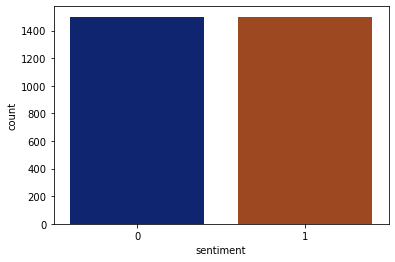

In [37]:
#Exploring how the data for df is distributed.  
sn.countplot(data = df, x = 'sentiment', palette = 'dark')

B1d. Reasoning for the chosen maximum sequence length

The justification for selecting the maximum length is to protect the input data that is currently accessible and prevent the resulting model from producing results that are unlikely to generalize effectively. Padding's implementation is to handle inputs shorter than a sequence's allowed length.

In [38]:
commentary = df_a['review']
czz= []
for zzzchar_len in commentary:
    czz.append(len(zzzchar_len.split(' ')))
cmax = np.max(czz)

print(cmax)
#Finding the length of the maximum sequence length of amazon dataframe



30


In [39]:
commentary = df_i['review']
czz = []
for zzzchar_len in commentary:
    czz.append(len(zzzchar_len.split(' ')))
commentary_max = np.max(czz)

print(commentary_max)
#Finding the length of the maximum sequence length of imdb dataframe


72


In [40]:
commentary = df_y['review']
czz = []
for zzzchar_len in commentary:
    czz.append(len(zzzchar_len.split(' ')))
commentary_max = np.max(czz)

print(commentary_max)
#Finding the length of the maximum sequence length of yelp dataframe

32


In [41]:
def process(txt, score, size_of_test):
    X_train, X_test, y_train, y_test = train_test_split(txt, score, test_size= size_of_test, random_state=11)
    maximum_length = txt.apply(lambda x : len(re.findall(r'\w+', x))).max()
    tknzrs = Tokenizer(oov_token = '<UNK>') #Identifying the vocabulary size
    tknzrs.fit_on_texts(X_train)
    vocabs = len(tknzrs.word_index)+1
    wi = tknzrs.word_index
    ts = tknzrs.texts_to_sequences(X_train) #trainsequence
    tests = tknzrs.texts_to_sequences(X_test) #testsequence
    tp = pad_sequences(ts, padding='post', maxlen=maximum_length) #trainpadding
    testp= pad_sequences(tests, padding='post', maxlen=maximum_length) #testpadding
    return vocabs, maximum_length, wi, ts, tests, tp, testp, y_train, y_test

B2. Purpose Behind Tokenization

The text is divided into smaller units, or tokens, during the tokenization process. Each word in the text is given a different "word index," which will aid in training the given model. The tokenization method can also standardize texts, replace strange characters,  and lemmatize words to create sequences. 
The tokenization code process is listed above inside the "process" function.

B3. Padding Method

In neural networks, padding is a method for increasing performance while maintaining the shape of the tensor dimensions. Because of this, neural networks need an input of the same size and form as its output. We must use padding to make all the input sentences the same length because each sentence may have a different number of words.
The padding code process is listed above inside the "process" function.

B4. Categories of sentiment and activation function

Labels for the data set are set to 0 and 1. A review is rated positively or negatively using the number 1. There are just two possible results for the final output in this binary classification task. For binary classification issues, the activation function is sigmoid. The output layer of the network will use this type of activation function. ReLU is utilized as the activation function between the hidden layers.


B5. Data Cleaning Steps

1. Look at the dataset's information and look for odd or otherwise weird characters.
2. View and explore the information - clean the data in an appropriate way
3. Encode our ratings into a two-dimensional NumPy array.
4. Create training and test sets from the data using an 70/30 split.
5. Use the fit_on_texts() method to tokenize the training set.
6. Obtain the training set's word index.
7. Pre- and post-pad the sequence to get the required maximum length.
8. Use NumPy to turn the training and testing sets into arrays before fitting the final model.

In [42]:
def graph(fs, m):
    plt.plot(fs.history[m])
    plt.plot(fs.history['val_'+m], '')
    plt.xlabel("Epoch")
    plt.ylabel(m)
    plt.legend([m, 'val_'+m])
    plt.show()

def sa(tp, testp, y_train, y_test, vocabs):
    cb = EarlyStopping(monitor='val_loss', patience=3)
    model = Sequential()
    model.add(Embedding(input_dim=vocabs, output_dim=10, mask_zero=True))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())

    fs = model.fit(tp, y_train.values, epochs=51, validation_split=0.3, callbacks=[cb])
    plt.figure(figsize=(17, 9))
    plt.subplot(1, 3, 1)
    graph(fs, 'accuracy')
    plt.figure(figsize=(17, 9))
    plt.subplot(1, 3, 3)
    graph(fs, 'loss')
    
    loss, accuracy = model.evaluate(testp, y_test.values)
    print('Accuracy for this model is: %f' % (accuracy*100))
    return model

C1. The model. summary() method offers a simple way to visualize the Keras model's parts and an overview of the model. It provides information about the layers' names, types, shapes, and trainable parameter counts. Below is a list of the data frames model summaries.

C2. Type and the total number of layers and parameters

I modeled a neural network for each data frame with six total layers. The layer types are listed below within the model summary.
Yelp's data frame has a total of 17,526 parameters. Amazon's data frame has 15,866 parameters, while Imdb's has 25,276 parameters.

C3. Justification of hyperparameter selection

* Activation functions: The Sigmoid function is helpful for binary classification problems since it can forecast the likelihood that output will belong to a binary class because it ranges between 0 and 1. The ReLu function is frequently used for layers that are hidden. It is easy to use and effective at getting around the drawbacks of other activation functions. If the neural network needs to account for more than two different sorts of feelings, hidden dense layers are a preferable option.

* The number of nodes per layer: Experimentation can be used to determine the number of nodes per layer. As the model's accuracy increases, you can gradually add more hidden layers and nodes, starting with one hidden layer with, say, 51 nodes. You can stop adding nodes and layers when you realize that expanding the network's capacity no longer increases accuracy.

* Loss function: For classification analysis, binary crossentropy is helpful for datasets where rating sentiments use a binary 1 or 0 classification.

* Optimizer: The Adam algorithm is a stochastic gradient descent extension that iteratively updates network weights based on training data.

* Stopping Criteria: To increase generalization in the final model, you can apply early stopping criteria from preventing NN from overfitting. Early Stopping monitors the score and abruptly terminates training when the validation accuracy score does not rise after a given number of subsequent epochs. As soon as the validation score doesn't start to rise, the early stopping monitor terminates the training.

* Evaluation Metric: When evaluating how well your NN can categorize comments based on sentiment using your training dataset, you can use "accuracy" as the statistic. You can use your test set and "accuracy" to determine whether your model was at risk of overfitting. The degree to which accurate predictions on the test data set indicate how well the trained model can forecast attitudes on the brand-new test data. The loss values typically decrease, and the prediction accuracy rises as the model is trained throughout numerous epochs. The training dataset typically has higher accuracy than the validation data set. The loss function is minor on the training data set and more prominent on the validation data set. Our model evaluation metrics will be prediction accuracy and validation loss.

D. Model Evaluation

The training data set was used to generate the models. The evaluation of the neural network models for the three separate data sets is shown in the following section.

Below are the charts for accuracy and loss concerning epochs (regarding yelp's, amazon's, and imdb's data frame).
* The overall prediction accuracy on yelp's test data set is 78.0%. The yelp model ran for 16 epochs, and then training stopped. The validation loss kept decreasing until the 15th epoch and then started increasing. It's also based on the patience level of 3.
* The overall prediction accuracy on amazon's test data set is 78.3%. 16 epochs of the Amazon model were run, and then training stopped
* The overall prediction accuracy on the IMDb's test data set is 76.3%. 18 epochs of the IMDb model were run, and then training stopped

Overfitting is the term used to describe a model that learns the training dataset too well. On the training dataset, it performs well, however on the testing dataset, it does not. There are steps you can take to prevent overfitting, such as:

Beginning with a smaller network and gradually expanding its capacity by adding more layers and nodes as the network's performance looks to improve.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 10)          16980     
                                                                 
 global_average_pooling1d_9   (None, 10)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_27 (Dense)            (None, 25)                275       
                                                                 
 dropout_9 (Dropout)         (None, 25)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                260       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                      

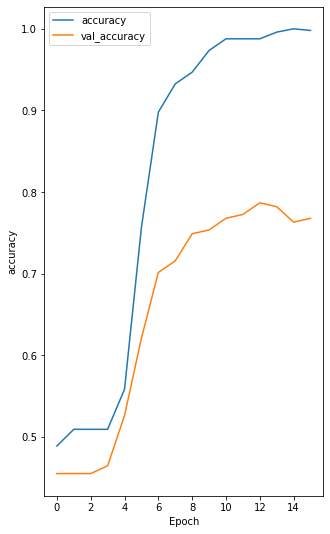

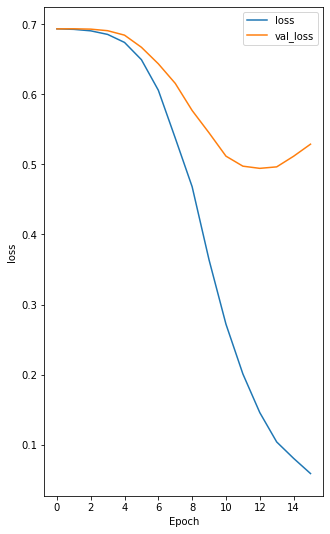

10/10 [==============================] - 0s 4ms/step - loss: 0.5011 - accuracy: 0.7800
Accuracy for this model is: 77.999997


In [43]:
vocabs, maxlen, word_index, ts, tests, tp, testp, y_train, y_test = \
process(df_y['review'], df_y['sentiment'], 0.3)
model = sa(tp, testp, y_train, y_test, vocabs)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 10)          15320     
                                                                 
 global_average_pooling1d_10  (None, 10)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_30 (Dense)            (None, 25)                275       
                                                                 
 dropout_10 (Dropout)        (None, 25)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                260       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                     

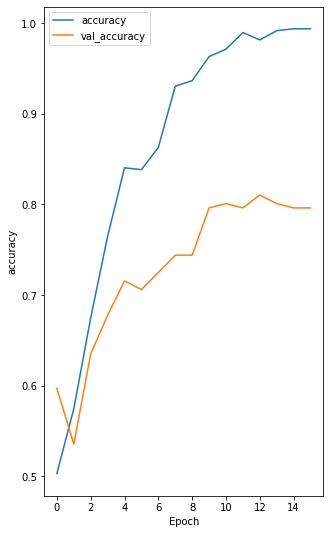

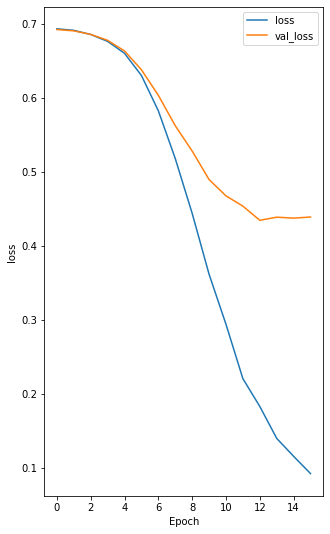

10/10 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.7833
Accuracy for this model is: 78.333336


In [44]:
vocabs, maxlen, word_index, ts, tests, tp, testp, y_train, y_test = \
process(df_a['review'], df_a['sentiment'], 0.3)
model = sa(tp, testp, y_train, y_test, vocabs)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 10)          24730     
                                                                 
 global_average_pooling1d_11  (None, 10)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_33 (Dense)            (None, 25)                275       
                                                                 
 dropout_11 (Dropout)        (None, 25)                0         
                                                                 
 dense_34 (Dense)            (None, 10)                260       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                     

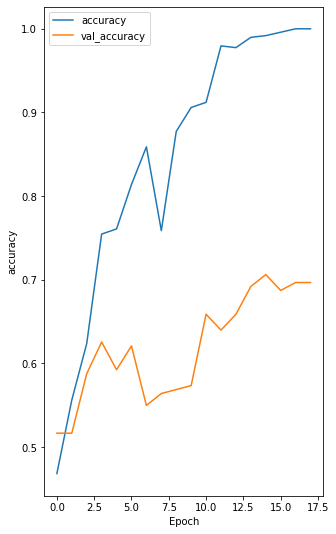

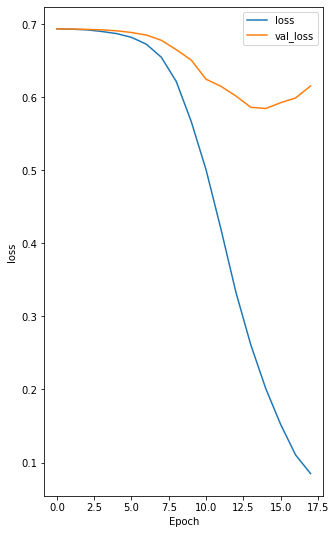

10/10 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7633
Accuracy for this model is: 76.333332


In [45]:
vocabs, maxlen, word_index, ts, tests, tp, testp, y_train, y_test = \
process(df_i['review'], df_i['sentiment'], 0.3)
model = sa(tp, testp, y_train, y_test, vocabs)

Part V:  Summary and Recommendations

In [ ]:
# Save model as JSON file
json = model.to_json()
with open("tf.json", "w") as file:
    file.write(json)

model.save_weights("tf_weights.h5")

Customer reviews were used to train the model, with labels representing the honest opinions expressed. Based on it, the model may have been adjusted to forecast the sentiments of new customer reviews and determine whether they are favorable or unfavorable.

As we saw in the preceding sections for the 3 data sets, Tensorflow neural networks were reasonably accurate at predicting the sentiments expressed in the reviews, between 70 and 80%. The data set used for the three organizations only contains 1000 reviews. If we train these networks on a larger dataset, the prediction accuracy should rise due to a more excellent vocabulary and learning over time.

Part VI: Reporting

I. Third Party code and Web sources 

* UCI Machine Learning Repository: Sentiment Labelled Sentences Data Set. archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences. Accessed 13 Sept. 2022.
* Lund, Preston. “Sentiment Analysis.” Lexalytics, 7 June 2022, www.lexalytics.com/technology/sentiment-analysis.
* Anis, Ahmad. “Getting Started With Sentiment Analysis Using Python | cnvrg.io.” Cnvrg, 26 Jan. 2021, cnvrg.io/sentiment-analysis-python.
* www.datacamp.com/tutorial/simplifying-sentiment-analysis-python. Accessed 13 Sept. 2022.